# Lab 1
** Name: Mingxue Li **

## 1. Executive Summary

Our analytical team examined the pricing policy for Trojan Airlines and applied simulation modeling to find optimized pricing parameters for each policy. Our process includes generating customers, simulating pricing policies and optimizing parameters. Below is a summary of our analysis results:

- Optimal price for constant pricing policy is **255**, and the expected profit is **2860.75**.  
- Optimal p1, p2 for dynamic pricing policy is **240 ,315**, and the expected profit is **3726.70**.  
- Optimal p1, p2, l for capacity rationing policy is **235, 315** and **38** and the expected profit is **4073.30**.

Based on the analytical result, we recommend the company to adopt Capacity Rationing policy with the highest expected profit which is 4073.30. 

## 2. Generating Customers

### Method 1

In [1]:
from scipy.stats import uniform
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def generateCustomers():
    arrival_time = []
    valuation = []
    leisure_size = int(norm(200, 60).rvs())
    business_size = int(norm(60, 20).rvs())
    leisure_time = uniform(0, 180)
    business_time = uniform(0, 14)
    leisure_maxpay = norm(200, 80)
    business_maxpay = norm(350, 120)
    for i in range (leisure_size+1):
        arrival1 = leisure_time.rvs()
        val1 = leisure_maxpay.rvs()
        arrival_time.append(arrival1)
        valuation.append(val1)

    for n in range(business_size+1):
        arrival2 = business_time.rvs()
        val2 = business_maxpay.rvs()
        arrival_time.append(arrival2)
        valuation.append(val2)
    customers = pd.DataFrame({'arrival_time':arrival_time,'valuation':valuation})
    customers=customers.sort_values(by = 'arrival_time', ascending = False).reset_index(drop=True) 
    return customers

np.random.seed(0)
generateCustomers().plot(x = 'arrival_time', y = 'valuation', kind = 'scatter')
plt.show()

<Figure size 640x480 with 1 Axes>

### Method 2

In [2]:
def generateCustomers():
    LC = round(np.random.normal(200, scale = 60))
    BC = round(np.random.normal(60, scale = 20))
    arrival_time_LC = np.random.uniform(low = 0, high = 180, size = LC)
    arrival_time_BC = np.random.uniform(low = 0, high = 14, size = BC)
    willingness_LC = np.random.normal(200, scale = 80, size = LC)
    willingness_BC = np.random.normal(350, scale = 120, size = BC)
    arrival_time = [round(i, 1) for i in list(arrival_time_LC) + list(arrival_time_BC)]
    valuation = [int(round(i)) for i in list(willingness_LC ) + list(willingness_BC)]
    df_dic = {'arrival_time':arrival_time, 'valuation':valuation}
    return pd.DataFrame(df_dic).sort_values('arrival_time', ascending = False).reset_index(drop = True)

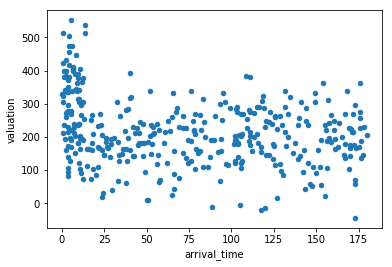

In [3]:
np.random.seed(0)
generateCustomers().plot(x = 'arrival_time', y = 'valuation', kind = 'scatter')

## 3. Simulating Pricing Policies

### Function simulateConstant()

In [4]:
def simulateConstant(customers, seats, p):
    num = 0
    for ind, value in enumerate(customers['valuation']):
        if value >= p:
            num += 1
    return p*min(num,seats)

### Function simulateDynamic()

In [5]:
def simulateDynamic(customers, seats,p1,p2):
    price1customer = customers[customers['arrival_time']>=14]
    price2customer = customers[customers['arrival_time']<14]
    
    count1 = 0
    for index, row in price1customer.iterrows():
        if row['valuation'] >= p1:
            count1 +=1
    
    if count1 >= seats:
        count1 = seats
        revenue = seats * p1
        #print("count of p1 is:",count1, ',which is equal to the number of seats')
    else:
        count2 = 0
        for index, row in price2customer.iterrows():
            if row['valuation'] >= p2:
                count2+=1

        count2 = min(seats-count1,count2)
        #print("count of p1 is:",count1)
        #print("count of p2 is:",count2)
        revenue = count1 * p1 + count2 * p2
        
    return revenue 

### Function simulateRationing()

In [6]:
def simulateRationing(customers, seats, p1, p2, l): 
    s = 0
    revenue = 0
    for ind, val in enumerate(customers['valuation']):
        seats_left = seats - s
        if seats_left > l:
            p = p1 
        else:
            p = p2
        if p <= val:
            s += 1
            revenue = revenue + p
        if s == seats:
            break
    return revenue 

### Testify the correctness of these functions

In [7]:
data=[[170,50],[150,40],[13,95],[12,100]]
customers=pd.DataFrame(data,columns=['arrival_time','valuation'])
print('Constant policy with 2 seats p=50 \t:',simulateConstant(customers,2,50))
print('Constant policy with 2 seats p=100 \t:',simulateConstant(customers,2,100))
print('Dynamic policy with 3 seats p1=40, p2=95 \t:',simulateDynamic(customers,3,40,95))
print('Dynamic policy with 2 seats p1=40, p2=95 \t:',simulateDynamic(customers,2,40,95))
print('Dynamic policy with 1 seats p1=50, p2=100 \t:',simulateDynamic(customers,1,50,100))
print('Rationing policy with 3 seats p1=40, p2=100, l=1 \t:',\
        simulateRationing(customers,3,40,100,1))
print('Rationing policy with 2 seats p1=40, p2=100, l=1 \t:',\
        simulateRationing(customers,2,40,100,1))
print('Rationing policy with 1 seats p1=40, p2=95, l=1 \t:',\
simulateRationing(customers,1,40,95,1))

Constant policy with 2 seats p=50 	: 100
Constant policy with 2 seats p=100 	: 100
Dynamic policy with 3 seats p1=40, p2=95 	: 175
Dynamic policy with 2 seats p1=40, p2=95 	: 80
Dynamic policy with 1 seats p1=50, p2=100 	: 50
Rationing policy with 3 seats p1=40, p2=100, l=1 	: 180
Rationing policy with 2 seats p1=40, p2=100, l=1 	: 140
Rationing policy with 1 seats p1=40, p2=95, l=1 	: 95


## 4. Optimizing Parameters

In [8]:
import numpy as np
np.random.seed(0)
customers_set = []
for i in range(100):
    c = generateCustomers()
    customers_set.append(c)

### Function optimizeConstant()

In [9]:
def optimizeConstant(customers_set, price_min, price_max, seats):
    fixed_cost = 20000
    best_price = 0
    best_expected_profit = -100000000
    profit = 0
            
    for p in range(price_min, price_max, 100):
        final_revenue = []
        for cust in customers_set:
            final_revenue.append(simulateConstant(cust,seats,p))
        final_revenue = pd.Series(final_revenue)
        profit = final_revenue.mean() - fixed_cost
        if profit >= best_expected_profit:
            best_expected_profit = profit
            best_price = p
    
    for p in range(best_price-100, best_price+100, 20):
        final_revenue = []
        for cust in customers_set:
            final_revenue.append(simulateConstant(cust,seats,p))
        final_revenue = pd.Series(final_revenue)
        profit = final_revenue.mean() - fixed_cost
        if profit >= best_expected_profit:
            best_expected_profit = profit
            best_price = p
    
    for p in range(best_price-20, best_price+20, 5):
        final_revenue = []
        for cust in customers_set:
            final_revenue.append(simulateConstant(cust,seats,p))
        final_revenue = pd.Series(final_revenue)
        profit = final_revenue.mean() - fixed_cost
        if profit >= best_expected_profit:
            best_expected_profit = profit
            best_price = p  
    print('constant Price Policy : best p ={:.0f}, best expected profit ={:.2f}'.format(best_price,best_expected_profit)) 

In [10]:
optimizeConstant(customers_set, 0,700,100)

constant Price Policy : best p =255, best expected profit =2860.75


### Function optimizeDynamic()

In [11]:
def optimizeDynamic(customers_set, price1_min, price1_max, price2_min, price2_max, seats):
    fixed_cost = 20000
    best_expected_profit = -50000000

    for p1 in range(price1_min, price1_max, 100):
        for p2 in range(price2_min, price2_max, 100):
            final_revenue = []
            for cust in customers_set:
                final_revenue.append(simulateDynamic(cust,seats,p1,p2))
            final_revenue = pd.Series(final_revenue)
            profit = final_revenue.mean() - fixed_cost
            if profit >= best_expected_profit:
                best_expected_profit = profit
                best_p1 = p1
                best_p2 = p2
            
                
    for p1 in range(best_p1-100, best_p1+100, 20):
        for p2 in range(best_p2-100, best_p2+100, 20):
            final_revenue = []
            for cust in customers_set:
                final_revenue.append(simulateDynamic(cust,seats,p1,p2))
            final_revenue = pd.Series(final_revenue)
            profit = final_revenue.mean() - fixed_cost
            if profit >= best_expected_profit:
                best_expected_profit = profit
                best_p1 = p1
                best_p2 = p2
            
                
    for p1 in range(best_p1-20, best_p1+20, 5):
        for p2 in range(best_p2-20, best_p2+20, 5):
            final_revenue = []
            for cust in customers_set:
                final_revenue.append(simulateDynamic(cust,seats,p1,p2))
            final_revenue = pd.Series(final_revenue)
            profit = final_revenue.mean() - fixed_cost
            if profit >= best_expected_profit:
                best_expected_profit = profit
                best_p1 = p1
                best_p2 = p2
    print('Dynamic Price Policy : best p1 ={}, best_p2 = {}, best expected profit = {:.2f}'.format(best_p1,best_p2,best_expected_profit))  

In [12]:
optimizeDynamic(customers_set, 0,700,50,1000,100)

Dynamic Price Policy : best p1 =240, best_p2 = 315, best expected profit = 3726.70


### Function optimizeRationing()

In [13]:
def optimizeRationing(customers_set, min_p1, max_p1, min_p2, max_p2, min_l, max_l, seats):
    fixed_cost = 20000
    best_expected_profit = -1000000

    for p1 in range(min_p1, max_p1, 100):
        for p2 in range(min_p2, max_p2, 100):
            for l in range(min_l, max_l):
                fin_rev = []
                for cust in customers_set:
                    fin_rev.append(simulateRationing(cust,seats,p1,p2,l))
                fin_rev = pd.Series(fin_rev)
                profit = fin_rev.mean() - fixed_cost
                if profit >= best_expected_profit:
                    best_expected_profit = profit
                    best_p1 = p1
                    best_p2 = p2
                    best_l = l
    
    for p1 in range(best_p1,best_p1+100, 20):
        for p2 in range(best_p2-50, best_p2+50, 20):
            for l in range(1, 100):
                fin_rev = []
                for cust in customers_set:
                    fin_rev.append(simulateRationing(cust,seats,p1,p2,l))
                fin_rev = pd.Series(fin_rev)
                profit = fin_rev.mean() - fixed_cost
                if profit > best_expected_profit:
                    best_expected_profit = profit
                    best_p1 = p1
                    best_p2 = p2
                    best_l = l
    
    for p1 in range(best_p1-10, best_p1+10, 5):
        for p2 in range(best_p2-10, best_p2+10, 5):
            for l in range(1, 100):
                fin_rev = []
                for cust in customers_set:
                    fin_rev.append(simulateRationing(cust,seats,p1,p2,l))
                fin_rev = pd.Series(fin_rev)
                profit = fin_rev.mean() - fixed_cost
                if profit > best_expected_profit:
                    best_expected_profit = profit
                    best_p1 = p1
                    best_p2 = p2
                    best_l = l
    print("Capacity Rationing Policy : best p1 = {}, best p2 ={}, best l = {}, best expected profit = {:.2f}".format(best_p1,best_p2,best_l,best_expected_profit))                            

In [14]:
optimizeRationing(customers_set,200,300,300,400,0,100,100)

Capacity Rationing Policy : best p1 = 235, best p2 =315, best l = 38, best expected profit = 4073.30
